# Balancing between Paywalls and Search Engine Optimization

How Media Paywalls Should Work: A Research Case for Nation Media Group

Kabui, Charles  
2024-10-21

 *** 
[Read at <u>**ToKnow**</u>.ai](https://toknow.ai/posts/balancing-between-paywalls-and-search-engine-optimization/index.html) -- [Download as Notebook](https://toknow.ai/posts/balancing-between-paywalls-and-search-engine-optimization/index.output.ipynb) -- [Download as PDF](https://toknow.ai/posts/balancing-between-paywalls-and-search-engine-optimization/index.pdf)
 *** 

<figure>
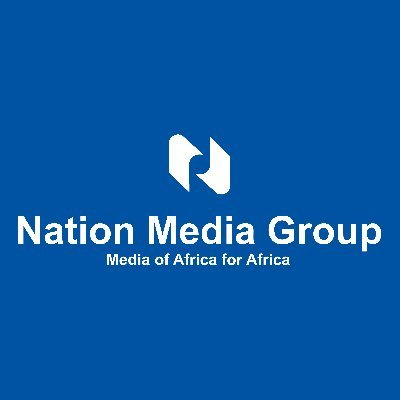
<figcaption aria-hidden="true">Nation Media Group logo</figcaption>
</figure>

## Introduction

To maintain independence in content creation, creators and authors need
sustainable monetization models. One of the most common monetization
methods for written content is through advertising. However, paywalls
offer another viable path for revenue generation.

In this context, paywalls represent a model that restricts content to
paying subscribers while limiting the reach for non-subscribers. When
implemented poorly, paywalls can hurt discoverability, often leading to
reduced traffic and lower engagement. This research provides insights
into maintaining a balance between paywalls and SEO, particularly for
media companies like Nation Media Group.

## Paywalls and SEO: A Delicate Balance

For users to discover your content, they need to find it in search
engines such as Google, Bing, or DuckDuckGo. For best results, it makes
sense to allow search engines to see the entire premium article,
enabling them to suggest it when users search for similar content. This
practice is called search engine optimization (SEO). You might have the
best news content, but if no one can find it, it’s essentially useless.

The challenge of allowing partial access to premium content while still
restricting it to paid users is a delicate balance that most media
houses must maintain. Users often find clever ways to circumvent
paywalls to access paid content for free. There are online forums
dedicated to discovering these vulnerabilities, such as “[Bypassing
Daily Nation
Paywall](https://www.reddit.com/r/Kenya/comments/s96k01/bypassing_daily_nation_paywall/?rdt=48760)”
and “[You can bypass most soft paywalls with a little CSS
knowledge](https://www.reddit.com/r/educationalgifs/comments/lk1not/you_can_bypass_most_soft_paywalls_with_a_little/)”.
The ideas shared in these forums are often simple but require basic
programming skills to execute. Consequently, most people would prefer to
pay rather than learn how to implement these bypasses.

However, some users create browser plugins that automatically do the
heavy lifting, allowing effortless access to premium content. Browser
plugin stores and code repositories containing paywall bypass tools are
usually taken down, such as the well-known
<https://github.com/iamadamdev/bypass-paywalls-chrome>. Yet, the code
often finds a new home before removal, as seen with
<https://github.com/nikolqyy/bypass-paywalls-chrome/releases/tag/most-recent>
[1].

This cat-and-mouse game is time-consuming for media companies, as they
must constantly identify which plugins are currently bypassing their
paywalls. Additionally, executing DMCA takedown notices is not
instantaneous. Even after a successful takedown, someone with a cloned
repository can reupload the code or plugin, and the cycle continues.
This strategy only affects publicly available plugins and ideas, and
ironically, the more control attempts are made, the more it spreads
awareness that the website can be bypassed. This may prompt users who
previously paid willingly to feel short-changed and start seeking bypass
methods.

Furthermore, this approach tends to target only well-known plugins and
repositories. Lesser-known repositories continue to grow unnoticed
(e.g., <https://github.com/nikolqyy/bypass-paywalls-chrome>). It’s
unlikely that users accustomed to accessing content for free will start
paying even if access is restricted. Moreover, users who have already
installed these plugins will continue to enjoy premium content without
paying.

## A Better Solution

After issuing a DMCA takedown notice, the next logical step is typically
to modify aspects of your website, such as class names and arrangement
of site contents, to render old bypass plugins ineffective. However,
there’s a more sophisticated solution that is scalable, cost-effective,
and doesn’t compromise search engine optimization. This improved
approach involves maintaining a select list of search engines that are
allowed to access all premium content for SEO purposes. This list may
include Google, Bing, DuckDuckGo, Yandex, Baidu, Yahoo, and Ahrefs. On
your web servers, you would check the IP address of the calling client
and perform a reverse DNS lookup to determine if the IP address is
associated with the whitelisted search engines. Of course, this
operation is nerwork expensive and should be optimized by caching the
results for a set period, such as one week. This means that an IP
address identified as belonging to a search engine would not need to be
re-evaluated for approximately seven days. This strategy maintains a
good balance between functionality and performance.

## Nation Media Group’s Case

Nation Media Group, a leading media house in East Africa, is in a unique
position to improve its paywall strategy. Currently, they leverage
**Cloudflare** as their content delivery network (CDN). This presents an
opportunity to optimize their paywall solution using Cloudflare’s
services without significant overhead.

The vulnerabilities detailed here affect <https://nation.africa/> and
<https://www.businessdailyafrica.com/>.

### Initial CSS-Based Paywall

Nation Media Group’s intial attempt used simple CSS classes to hide
premium content, which could be easily bypassed with basic JavaScript.

``` js
setTimeout(() => {
    // https://nation.africa/
    // Remove the paywall element
    document.querySelector('.wall-guard')?.remove();
    // Allow copying the text
    document.querySelectorAll('.blk-txt')?.forEach(
      i => i.classList.remove('blk-txt'));

    // https://www.businessdailyafrica.com/
    // Remove the paywall spinner
    document.querySelector('.spinner')?.remove();
    // Remove the paywall element
    document.querySelector('.paywall')?.remove();
    // Remove the call for action
    document.querySelector('.grid-container-medium')?.remove();

    // https://www.businessdailyafrica.com/ AND https://nation.africa/
    // Show the hidden content
    document.querySelectorAll('.paragraph-wrapper.nmgp')?.forEach(
      i => i.classList.remove('nmgp'));
}, 1);
```

### Enhanced JavaScript Security Layer

After we reported the issue to them[2], Nation Media Group added a
JavaScript layer to prevent easy access to premium content. They
implemented a more sophisticated JavaScript-based security measure.

The new JavaScript code now removes the actual content from the Document
Object Model (DOM), meaning that CSS manipulation alone is no longer
sufficient to reveal the hidden content. Nevertheless, there remains a
way to silently disable JavaScript by re-fetching the HTML and parsing
it as DOM without executing the JavaScript. This method essentially
allows the old CSS-based bypass technique to continue functioning.

This more advanced bypass script operates by fetching the original HTML,
removing paywall elements, enabling images, and replacing the entire
body content. By doing so, it effectively circumvents the enhanced
security measures put in place by the media outlet.

``` js
setTimeout(async () => {
    // fetch html src
    const htmlString = await fetch(location.href).then(resp => resp.text())
    const newHtmlDocument = new DOMParser().parseFromString(
        htmlString, 'text/html');
    // https://nation.africa/
    // Remove the paywall element
    newHtmlDocument.querySelector('.wall-guard')?.remove();
    // Allow copying the text
    newHtmlDocument.querySelectorAll('.blk-txt')?.forEach(
        i => i.classList.remove('blk-txt'));

    // https://www.businessdailyafrica.com/
    // Remove the paywall spinner
    newHtmlDocument.querySelector('.spinner')?.remove();
    // Remove the paywall element
    newHtmlDocument.querySelector('.paywall')?.remove();
    // Remove the call for action
    newHtmlDocument.querySelector('.grid-container-medium')?.remove();

    // https://www.businessdailyafrica.com/ AND https://nation.africa/
    // Show the hidden content
    newHtmlDocument.querySelectorAll('.paragraph-wrapper.nmgp')?.forEach(
        i => i.classList.remove('nmgp'));
    // Stop all events
    // document.body.outerHTML += ''
    // Enable images
    newHtmlDocument.querySelectorAll('img.lazy-img').forEach(
        i => i.classList.remove('lazy-img'))
    newHtmlDocument.querySelectorAll('img[data-src]').forEach(img => {
        const { dataset } = img;
        img.src = dataset.src ?? img.src;
        img.srcset = dataset.srcset ?? img.srcset;
    });
    // Remove spinners
    newHtmlDocument.querySelectorAll('.spinner').forEach(i => i.remove());
    // Remove cloundflare email protection label
    newHtmlDocument.querySelector('.__cf_email__')
        ?.closest('.paragraph-wrapper')?.remove();
    // Remove external scripts from the new DOM
    Array.from(newHtmlDocument.getElementsByTagName('script'))
        .forEach(script => script.src ? script.remove() : null);
    // Remove iframes from the new DOM
    Array.from(newHtmlDocument.getElementsByTagName('iframe'))
        .forEach(iframe => iframe.remove());

    document.body.outerHTML = newHtmlDocument.body.outerHTML;

    removePopup(50, 0);

    // Remove external scripts from the old DOM
    Array.from(document.getElementsByTagName('script'))
        .forEach(script => script.src ? script.remove() : null);
    // Remove iframes from the old DOM
    Array.from(document.getElementsByTagName('iframe'))
        .forEach(iframe => iframe.remove());
    // Filter out elements not in body or head
    Array.from(document.documentElement.children).forEach(
        element => !['body', 'head'].includes(element.tagName.toLowerCase()) 
            ? element.remove() 
            : null);
    // remove popup and make page scrollable
    function removePopup (maxRetries, retries) {
        setTimeout(() => {
            const popUp = document.querySelector('.fc-ab-root')
            if (popUp) {
                popUp?.remove()
                document.body.style = ""
            } else if (retries < maxRetries) {
                removePopup(maxRetries, retries + 1)
            }
        }, 300);
    };
}, 10)
```

To validate, you can use the article that was premium before June 2024,
and is still premium now, such as
<https://nation.africa/kenya/business/inside-world-bank-tough-terms-sh158bn-loan-kenya-4642634>.
To test the old logic, use an archived version of the premium article at
<https://web.archive.org/web/20240601075749/https://nation.africa/kenya/business/inside-world-bank-tough-terms-sh158bn-loan-kenya-4642634>.
Please note this may stop working at any time depending on changes they
make on their platforms.

### Implementing the Suggested Approach (`python code`)

This approach would significantly increase the difficulty of bypassing
the paywall while still allowing search engines to index the full
content. However, it’s worth noting that determined users could
potentially access the content by routing their requests through
services like Google’s PageSpeed Insights (<https://pagespeed.web.dev/>)
or Rich Results Test (<https://search.google.com/test/rich-results>).

**Implementation Considerations**

To implement this solution effectively, consider the following:

1.  **Performance Optimization**: Ensure that the IP lookup and content
    serving process is optimized to minimize latency. Utilize caching.
2.  **Regular Updates**: Continuously monitor and update the list of
    whitelisted search engine hostnames.
3.  **Fallback Mechanism**: Implement a fallback strategy for cases
    where the reverse DNS lookup fails or times out.
4.  **User Experience**: Design the system to handle edge cases
    gracefully, ensuring a smooth experience for legitimate users and
    search engine crawlers.
5.  **Compliance**: Ensure that the implementation complies with
    relevant data protection and privacy regulations, such as
    implementing a secure storage for cached IP information.

By addressing these considerations, you can create a robust system that
balances content protection with search engine accessibility.

[1] https://news.ycombinator.com/item?id=41294166

[2] We [contacted Nation Media
Group](https://www.nationmedia.com/contact/) through the following
emails: <support@nation.africa>, <sales_inquiries@ke.nationmedia.com>,
<newsdesk@ke.nationmedia.com>, <publiceditor@ke.nationmedia.com>,
<mailbox@ke.nationmedia.com>, <epaper@ke.nationmedia.com>,
<Customercare@ke.nationmedia.com> on Jun 3, 2024, 2:30 PM East African
Time

In [2]:
import socket
from ipaddress import ip_address as parse_ip_address

async def reverse_dns_lookup(ip_address: str, *host_names: str) -> bool:
    """
    Perform reverse DNS lookup.
    Usage example:
        await reverse_dns_lookup("66.249.66.1", "googlebot.com", "google.com")
    
    Parameters
    ----------
    ip_address : str
        the ip address of the client that called the server, 
        or the header value of "X-Forwarded-For" incase a 
        proxy/CDN such as cloudflare is used!
    host_names : list[str]
        allowed search engines
        eg: "googlebot.com", "search.msn.com", "duckduckgo.com", etc

    More Information:
    Verifying Googlebot: 
        https://developers.google.com/search/docs/advanced/crawling/verifying-googlebot
    How to access the sitemap.xml file of stackoverflow.com
        https://meta.stackexchange.com/a/324471
    Reverse IP Domain Check?
        https://stackoverflow.com/a/716753/3563013
    """
    try:
        if len(host_names) > 0:
            # Raises `ValueError`if ip_address is not valid IPv4 or IPv6 
            # address.
            valid_ip_address: str = str(parse_ip_address(ip_address))
            # Perform reverse DNS lookup
            # Get hostname from IP, 
            # eg: ('crawl-66-249-66-1.googlebot.com', [], ['66.249.66.1'])
            ip_address_hostname, aliases_1, _ = socket.gethostbyaddr(
                valid_ip_address)
            # Get all IP addesses resolving the hostname (both IPv4 and IPv6)
            ip_address_list = list(set(
                [ip[4][0] 
                 for ip 
                 in socket.getaddrinfo(ip_address_hostname, None)]))
            # Check if IP matches any of the addresses for the hostname
            if valid_ip_address in ip_address_list:
                # Perform forward DNS lookup to get all aliases
                _, aliases_2, _ = socket.gethostbyname_ex(ip_address_hostname)
                all_aliases = list(set(
                    [ip_address_hostname] + aliases_1 + aliases_2))
                # Check if hostname or its aliases match any of the allowed 
                # hosts
                return any(
                    host_name 
                    for host_name 
                    in host_names
                    if any(
                        alias 
                        for alias 
                        in all_aliases 
                        if alias.casefold().strip() == \
                            host_name.casefold().strip() \
                            or alias.casefold().strip().endswith(
                                f".{host_name.casefold().strip()}")))
    except:
        pass
    return False

# Test
await reverse_dns_lookup(
    "66.249.66.1", "googlebot.com", "googleusercontent.com", "google.com")

True

### Leveraging Cloudflare’s Web Workers

Given Nation Media Group’s existing infrastructure with Cloudflare, they
don’t need to rewrite their server code. Instead, they can utilize an
intermediary service from Cloudflare known as [Web
Workers](https://workers.cloudflare.com/). [Cloudflare
Workers](https://workers.cloudflare.com/) allow for the interception of
requests and the implementation of more complex logic, such as reverse
DNS lookups, without requiring changes to the core server
infrastructure.

Cloudflare Workers provide first-class support for JavaScript,
TypeScript, Python, and Rust, and they can support any programming
language via
[WebAssembly](https://developers.cloudflare.com/workers/runtime-apis/webassembly/).
Additionally, the cost model is favorable, with the first `100,000`
requests per day being free and a modest fee of `$5` for every
`10 million` requests beyond that.

**Advantages of Cloudflare Workers:**

1.  **Efficiency**: Minimal impact on server infrastructure.
2.  **Scalability**: Cloudflare’s global infrastructure can handle
    large-scale traffic.
3.  **Cost-effectiveness**: Free for low to moderate usage, with low
    costs for higher volumes.
4.  **Performance**: Requests can be intercepted and resolved in
    <u>**pararell**</u> with reverse DNS lookup, ensuring faster
    response times.

## Conclusion

No system is foolproof, and it’s important for media companies to
maintain ongoing vigilance and updates to ensure the integrity of their
paywalls. As the digital media landscape continues to evolve, so too
must the strategies for protecting and monetizing content.

------------------------------------------------------------------------

***Disclaimer:*** *For information only. Accuracy or completeness not
guaranteed. Illegal use prohibited. Not professional advice or
solicitation.* *You will be peronally liable for any misuse of the
information provided here. We [contacted Nation Media
Group](https://www.nationmedia.com/contact/) on Jun 3, 2024, 2:30 PM
East African Time, but they did not respond [1].* ***Read more:
[/terms-of-service](https://toknow.ai/terms-of-service)***

[1] We [contacted Nation Media
Group](https://www.nationmedia.com/contact/) through the following
emails: <support@nation.africa>, <sales_inquiries@ke.nationmedia.com>,
<newsdesk@ke.nationmedia.com>, <publiceditor@ke.nationmedia.com>,
<mailbox@ke.nationmedia.com>, <epaper@ke.nationmedia.com>,
<Customercare@ke.nationmedia.com> on Jun 3, 2024, 2:30 PM East African
Time